In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.datasets import load_wine                     #datos
from sklearn.decomposition import PCA                      #reduccion de caracteristicas
from sklearn.preprocessing import StandardScaler           #escalamiento
from sklearn.naive_bayes import GaussianNB                 #asume que es un dist normal
from sklearn.metrics import accuracy_score                 #metrica de clasificacion
from sklearn.metrics import classification_report          #metrica de clasificacion
from sklearn.metrics import confusion_matrix               #metrica de clasificacion
from sklearn.model_selection import train_test_split       #divisor

In [2]:
dataset = load_wine()
wine = pd.DataFrame(dataset.data,columns= dataset.feature_names)
wine["target"]=dataset.target #columna target, para agregar target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
dataset = load_wine(as_frame=True)
wine=dataset.frame
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#dataset es un diccionario o se comporta como tal

# Analisis Exploratorio

In [5]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine.shape

(178, 14)

In [8]:
wine.info() #ahora aparece la columna target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
wine.describe()
#media en 13 y max en 14 (columna alcohol)
#min es 11

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
#hacer histograma de todas las columnas, hacer graficos del tipo kde, que vvean la distribucion de la poblacion

In [11]:
#q tanto se aleja de la media es la desviacion estandar (std)
#reemplazar data con el promedio tengo q ver q el std sea pequeño
rango = 14.83 - 11.03 #calcular rango max - min
valoracion_std = 00.811827/rango #std/rango
valoracion_std

0.21363868421052626

In [12]:
columna = wine['magnesium']
rango = columna.max() - columna.min() #max - min
valoracion_std = columna.std()/rango #std/rango
valoracion_std

0.1552443860358225

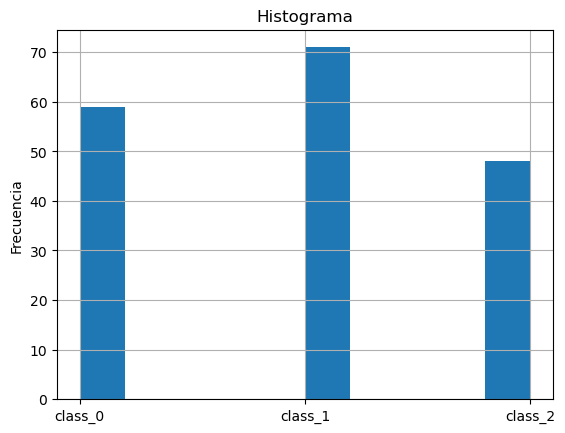

In [13]:
#target es la variable que se quiere predecir con el modelo 
#entonces es necesario conocer la distribucion de las categorias de la columna target
#lo ideal es que cada categoria tenga la misma cantidad de registros
wine['target'].hist()
plt.xticks([0,1,2],dataset.target_names)
plt.title('Histograma')
plt.ylabel('Frecuencia')
plt.show() #no parecen las cosas de programacion

#para desbalances se recomienda usar la metrica f1

<Axes: ylabel='Density'>

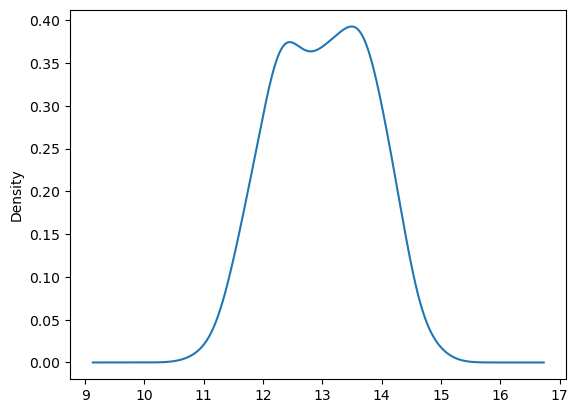

In [14]:
wine['alcohol'].plot(kind='kde') 

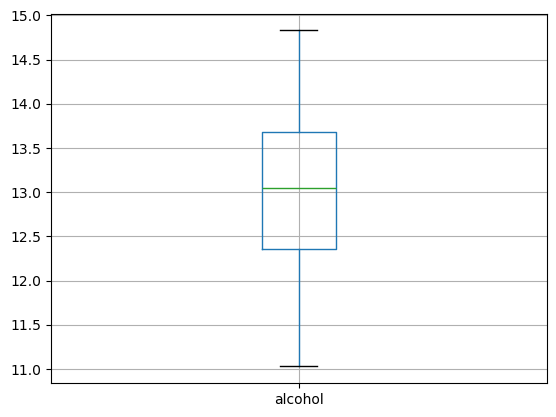

In [15]:
wine[['alcohol']].boxplot()
plt.show()

In [16]:
dataset.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

<Axes: >

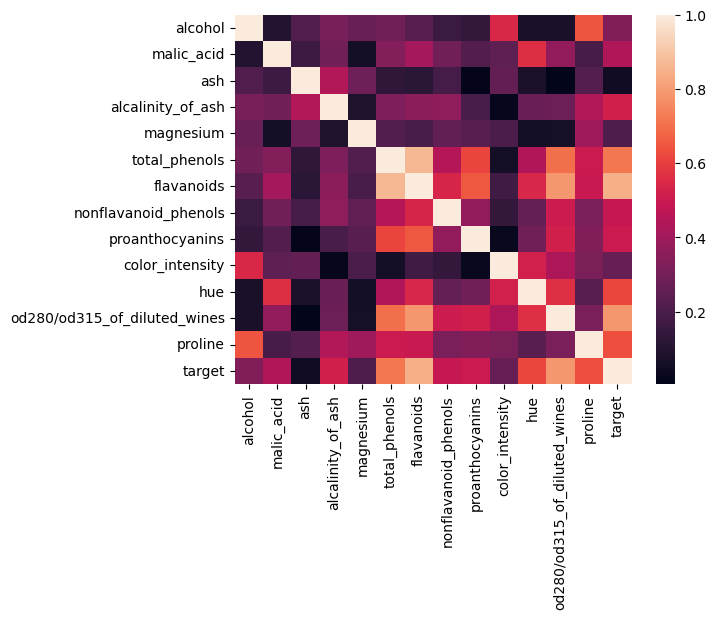

In [17]:
matris_corr = wine.corr().abs() #correlacion (mientras mas cercano a 1 mas correlaccion hay) 
#(quien con quien tiene mas correlaccion mientras mas sube uno mas sube el otro)
#
sns.heatmap(matris_corr) 
#regresion lineal los valores de la variable x deben ser 
#se podria descartar uno de los dos xq aportan lo mismo viendo la correlaccion

# ML

In [18]:
#concepto teorico
#y =f(X)
#y = f(x1,x2,x3....)
#se trata predecir el eje y va la variable target el resto de las columnas es el eje x , la finalidad es gacer prediccion , 
#encontrar un modelo que se ajuste a los patrones de los datos 
X = wine.drop('target',axis=1) #genera una copia de target donde realmente no existe, x es todas las columnas x sin la columna Y
y = wine['target']

# PCA

In [19]:
reductor = PCA(n_components=2)
reductor.fit(X)
X_ = reductor.transform(X)
#se paso de 13 columnas a solo 2 columnas
X_

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

## Escalamiento

In [20]:
#cuando se ocupa un escalador, este tambien se debe entrenar
#todos los transformadores tienen los mismos metodos
#... (fit, transform, fit_transform, etc)
#(tomando los datos iniciales los paso al conjunto Z,tratar de cambiar la distribucion de los datos)
escalador = StandardScaler()
escalador.fit(X_)
X_ = escalador.transform(X_)
X_

array([[ 1.01428247,  1.64083119],
       [ 0.9650412 , -0.40957298],
       [ 1.39475632, -0.49909529],
       [ 2.33458583,  0.01471403],
       [-0.03684263,  1.41163108],
       [ 2.23903942, -0.02535888],
       [ 1.72878392, -1.03211461],
       [ 1.74607355,  0.87411462],
       [ 0.94892874, -0.62451966],
       [ 0.94896914, -0.54217208],
       [ 2.42959297, -0.63628906],
       [ 1.69685434, -1.09079902],
       [ 1.8238651 , -1.60364196],
       [ 1.28288644, -1.22936652],
       [ 2.54731461, -0.92519101],
       [ 1.79333492,  0.16909259],
       [ 1.69824388,  0.8248999 ],
       [ 1.22045667,  0.64721432],
       [ 2.97098434, -0.63782828],
       [ 0.3133089 ,  1.09881727],
       [ 0.10695968,  1.95200285],
       [ 0.07369665,  0.13875621],
       [ 0.91726826, -0.30256109],
       [ 0.85323458, -0.73068184],
       [ 0.31208853, -0.41958407],
       [ 0.26585422,  1.74767626],
       [ 1.42616408, -1.12971221],
       [ 1.71269738, -1.17483364],
       [ 0.53557048,

In [21]:
#se designa una muestra de un 20% de los registros de forma aleatoria, para realizar pruebas de prediccion 
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=89) 
#random_state = para que la seleccion aleatoria no varie en las siguientes ejecucciones del programa, que sea la misma seleccion
#test_size=0.2 es un 20% de los datos /
#cuando tengo demasiados datos podria achicarlo a un 10%

In [22]:
modelo = GaussianNB()
#var_smoothing=1e-09 porcentaje de error, es preferible no torcarlo 

In [23]:
modelo.fit(X_train, y_train) #entrenando el modelo, le doy los datos de entrenamiento

GaussianNB()

In [24]:
#y_pred =f(X)
#y_pred = modelo.predict(x)
y_pred = modelo.predict(X_test)

In [25]:
print('exactitud: ',round(accuracy_score(y_test,y_pred),2)*100,'%')


exactitud:  78.0 %


In [26]:
reporte = classification_report(y_test,y_pred,output_dict=True)
df_reporte = pd.DataFrame(reporte)
df_reporte
                        

,0,1,2,accuracy,macro avg,weighted avg
precision,0.736842,0.833333,0.800000,0.777778,0.790058,0.788402
recall,1.000000,0.714286,0.500000,0.777778,0.738095,0.777778
f1-score,0.848485,0.769231,0.615385,0.777778,0.744367,0.765864
support,14.000000,14.000000,8.000000,0.777778,36.000000,36.000000


In [27]:
matriz_confusion = confusion_matrix(y_test,y_pred)
df_confusion = pd.DataFrame(matriz_confusion,columns=dataset.target_names, index=dataset.target_names)
df_confusion

,class_0,class_1,class_2
class_0,14,0,0
class_1,3,10,1
class_2,2,2,4


<Axes: >

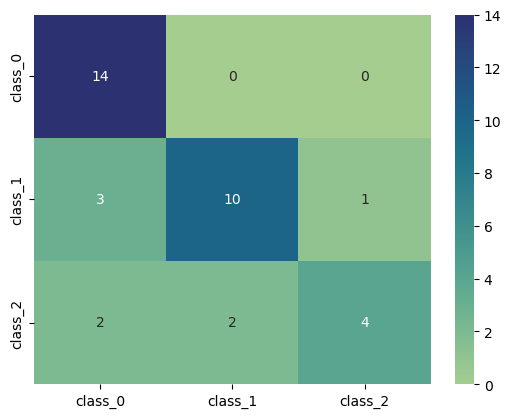

In [28]:
sns.heatmap(df_confusion,cmap="crest",annot=True)
#a la izquierda la prediccion, abajo lo real
#predije q pertenecian a la clase 1 un elemento, realmente pertenecian a la clase 0 
#si predije algo q no es es un falso positivo (en binario) , en español son falsas alarmas

In [29]:
#pasar todos los valore,s a la tabla z , estandarizar y la tabla de PCA

In [30]:
#precision = tp/(tp +fp)
#tp = true positive     #aciertos de una categoria en concreto
#fp = false positive    #desaciertos sobre la diagonal


In [43]:
#recall = tp / (tp + fn) 
#evalua en torno a la parte de abajo
#fn = false negative #desaciertos debajo de la diagonal
#14/(14+0)

In [32]:
#paso1: definir X e y
#paso 1.1: Reduccion de caracteristicas
#paso 1.2: (opcional) Standarizacion/normalizacion (X)
#paso2: dividir set de prueba y entrenamiento
#paso3: instanciar modelo
#paso4: entrenar modelo 
#paso5: predecir 
#paso6: evaluar 

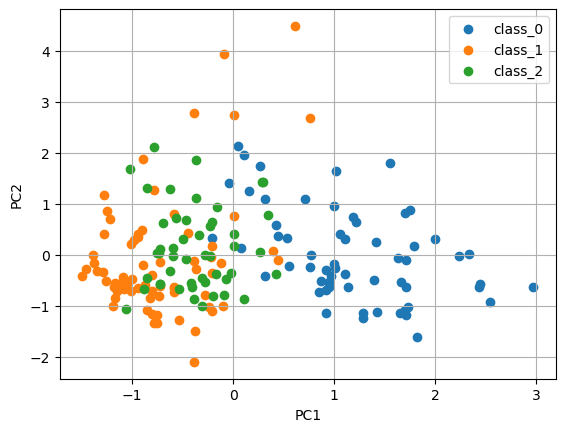

In [38]:
df_ = pd.DataFrame(X_,columns=['PC1','PC2'])
df_['target'] = y

filtro_0 = y==0
filtro_1 = y==1
filtro_2 = y==2

df_0 = df_[filtro_0]
df_1 = df_[filtro_1]
df_2 = df_[filtro_2]

plt.scatter(df_0['PC1'],df_0['PC2'], label='class_0')
plt.scatter(df_1['PC1'],df_1['PC2'], label='class_1')
plt.scatter(df_2['PC1'],df_2['PC2'], label='class_2')

plt.grid(True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [41]:
lista_ptjes = []
rango = range(2,13)
for k in rango:
    reductor = PCA(n_components=k)
    X_ = reductor.fit_transform(X)
    escalador = StandardScaler()
    X_ = escalador.fit_transform(X_)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=89)
    modelo = GaussianNB()
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    puntaje = round(accuracy_score(y_test,y_pred),2)*100
    lista_ptjes.append(puntaje)

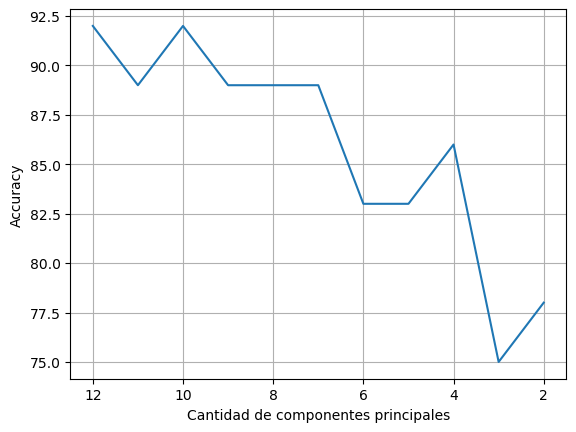

In [42]:
ax = plt.plot(rango,lista_ptjes)
plt.xlabel('Cantidad de componentes principales')
plt.ylabel('Accuracy')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

In [ ]:
#completar analisis exploratorio